In [32]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Read data
# TODO: replace with path to cleaned data
DATA_PATH = "../cleaned_output.csv"
data = pd.read_csv(DATA_PATH)

In [34]:
# Expected data:
# Q1: Categorical, complexity to make the food
# Q2: Numerical, number of ingredients
# Q3: Categorical, setting where the food is served
# Q4: Numerical, cost of the food
# Q5: Categorical, what movie goes with the food
# Q6: Categorical, what drink goes with the food
# Q7: Categorical, what people goes with the food
# Q8: Categorical, how much hot sauce

numerical_columns = [2, 4] # TODO: add 2, 4
categorical_columns = [3, 5, 6, 7, 8]

<Figure size 640x480 with 0 Axes>

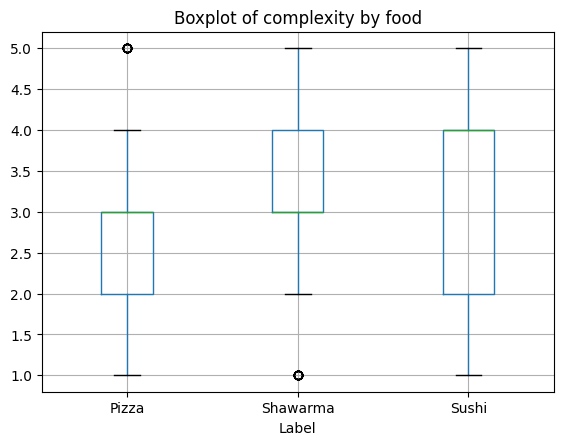

In [35]:
# Plot a bar, where each boxplot corresponds to a different food
plt.figure()
data.boxplot(column='Q1: From a scale 1 to 5, how complex is it to make this food? (Where 1 is the most simple, and 5 is the most complex)', by='Label')
plt.title(f"Boxplot of complexity by food")
plt.suptitle("")
plt.show()


/var/folders/rt/x1pynv8j1fb1hkbhs6y9v62m0000gn/T/ipykernel_25270/792564141.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


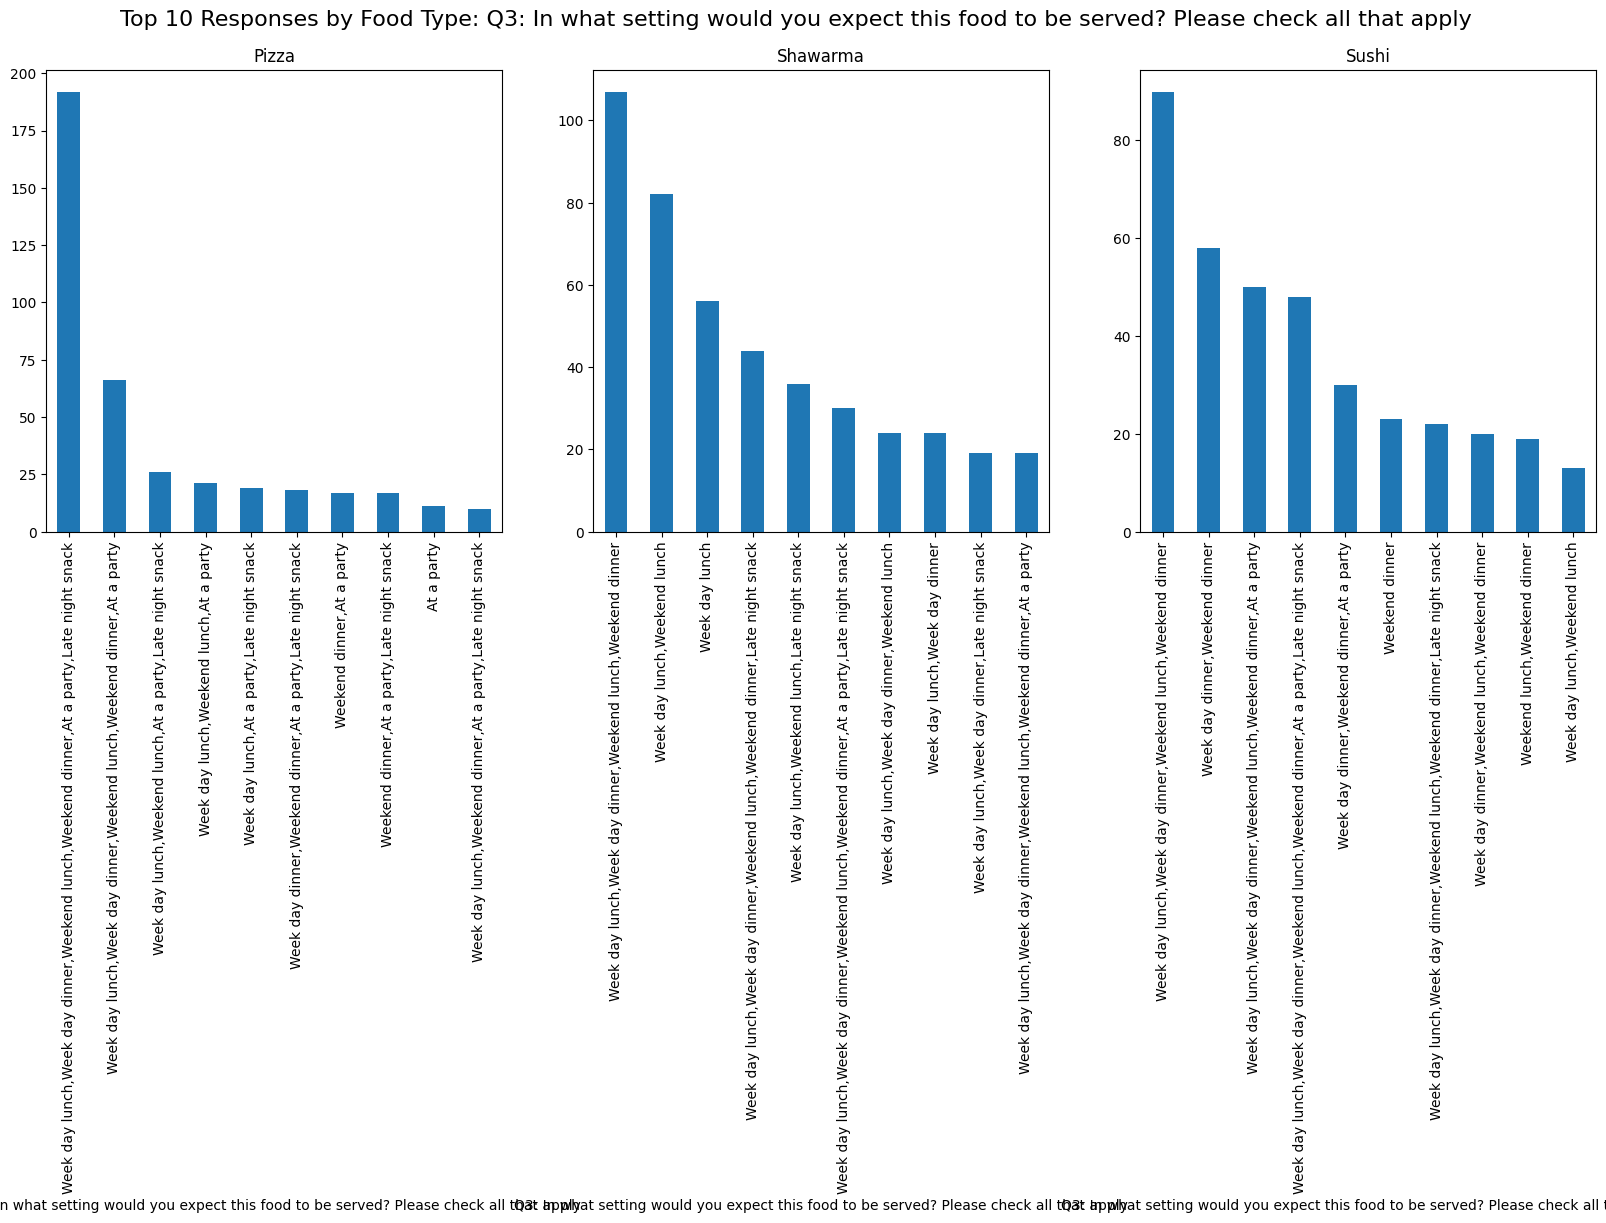

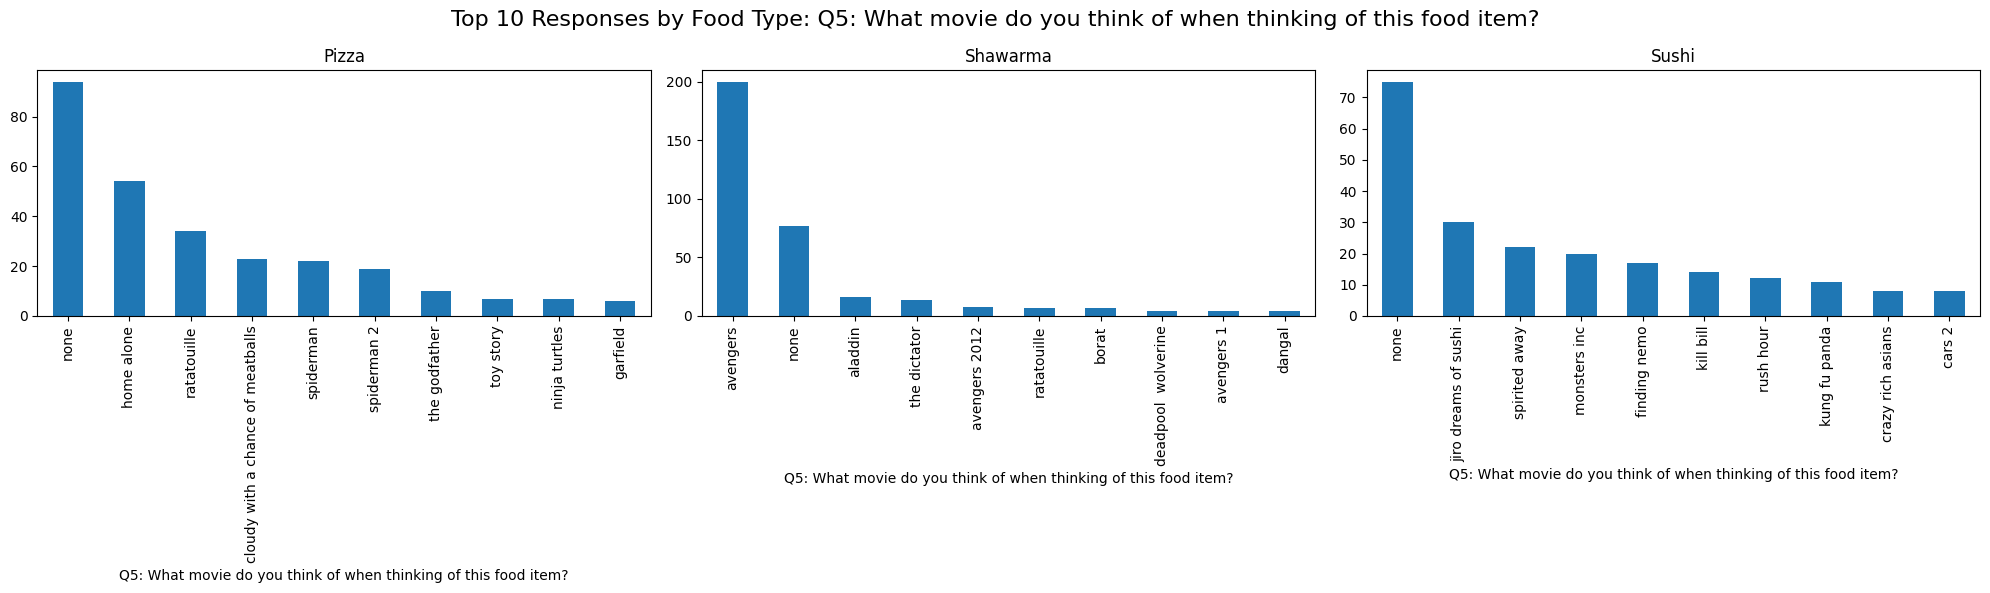

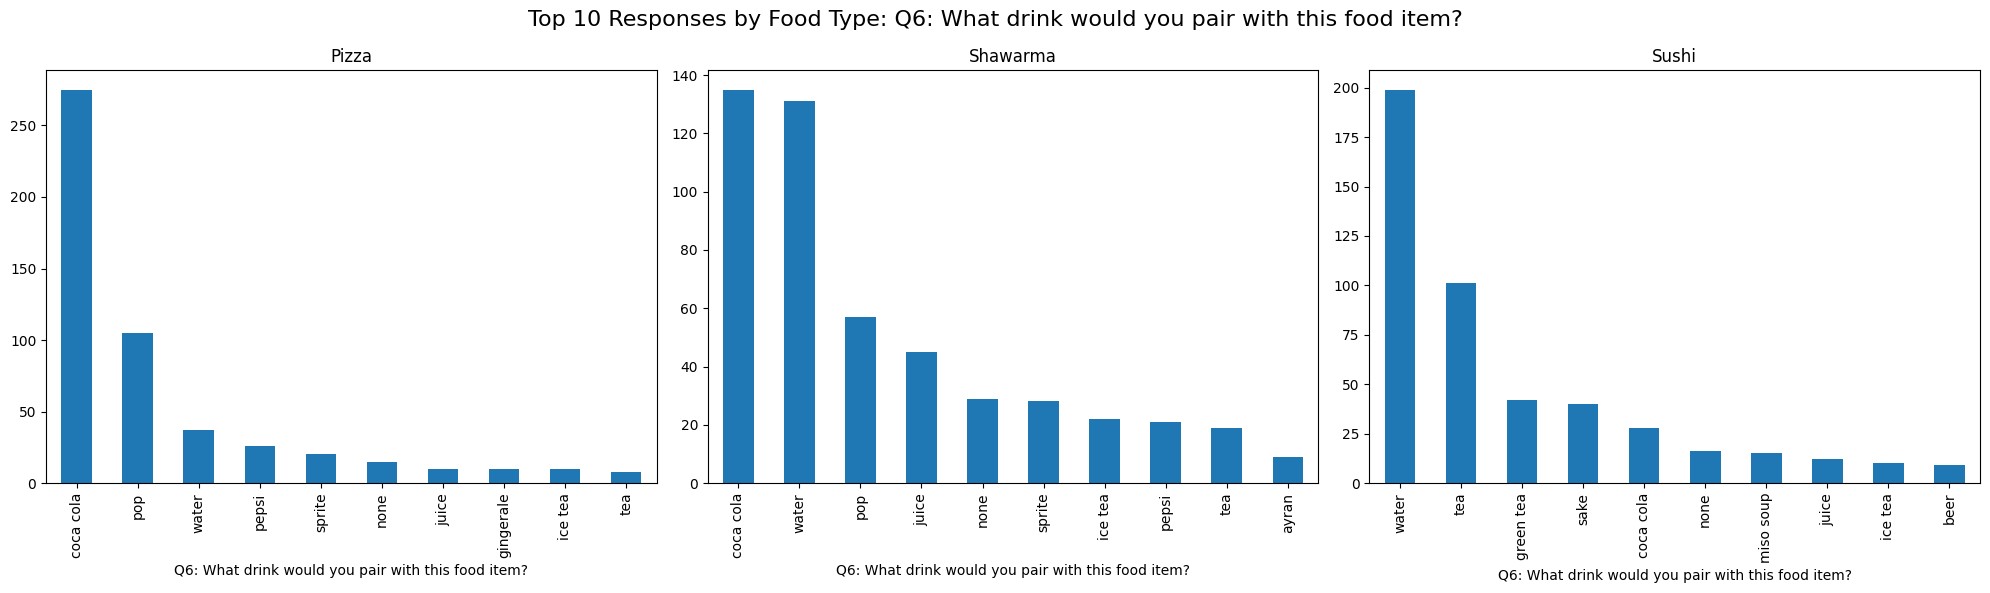

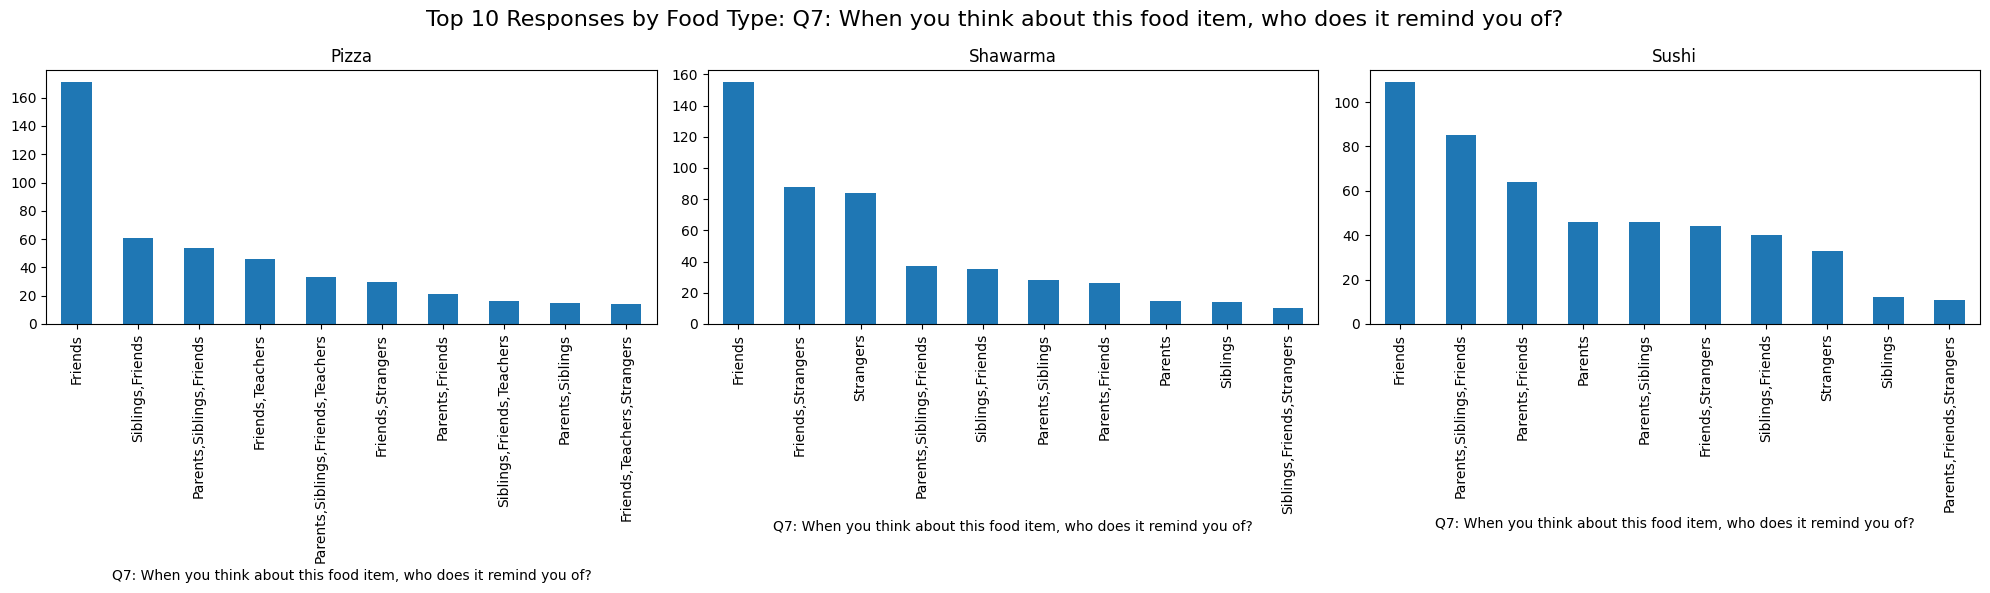

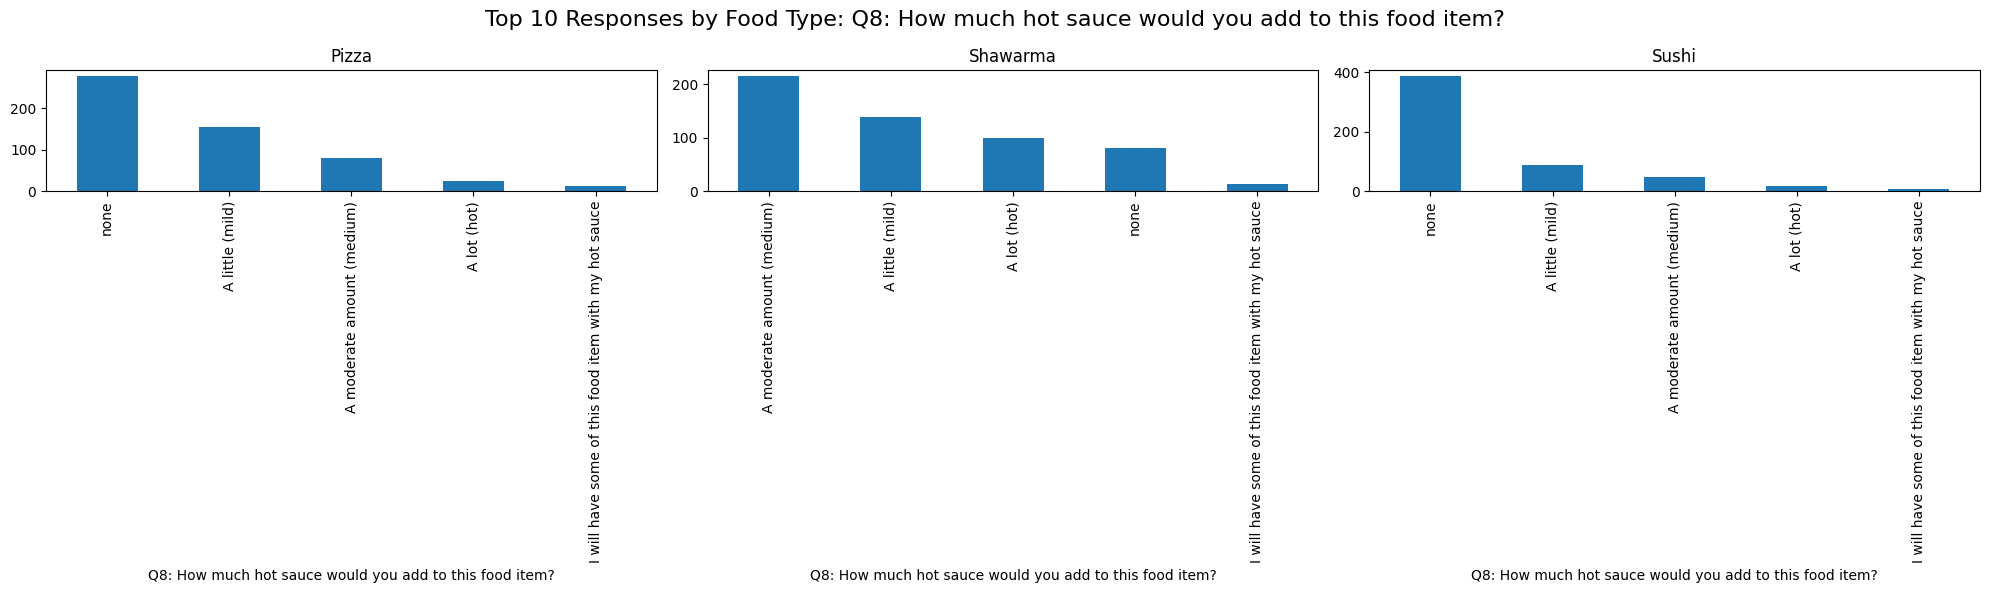

In [36]:
# Movies
# Visualize all categorical columns
categorical_columns = [3, 5, 6, 7, 8]

# Get the unique food labels
labels = data["Label"].unique()

# Create a visualization for each categorical column
for col_idx in categorical_columns:
    column = data.columns[col_idx]  # Get the actual column name directly from DataFrame
    
    # Create subplots - one for each food label
    fig, axes = plt.subplots(1, len(labels), figsize=(20, 6))
    fig.suptitle(f"Top 10 Responses by Food Type: {column}", fontsize=16)
    
    # Loop through labels and create each subplot
    for i, label in enumerate(labels):
        # Get the top 10 responses for this food item and column
        top_responses = data[data["Label"] == label][column].value_counts().head(10)
        
        # Plot as bar chart in the corresponding subplot
        top_responses.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{label}")
        
        # Only show y-label for the first subplot to reduce redundancy
        if i > 0:
            axes[i].set_ylabel("")
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()


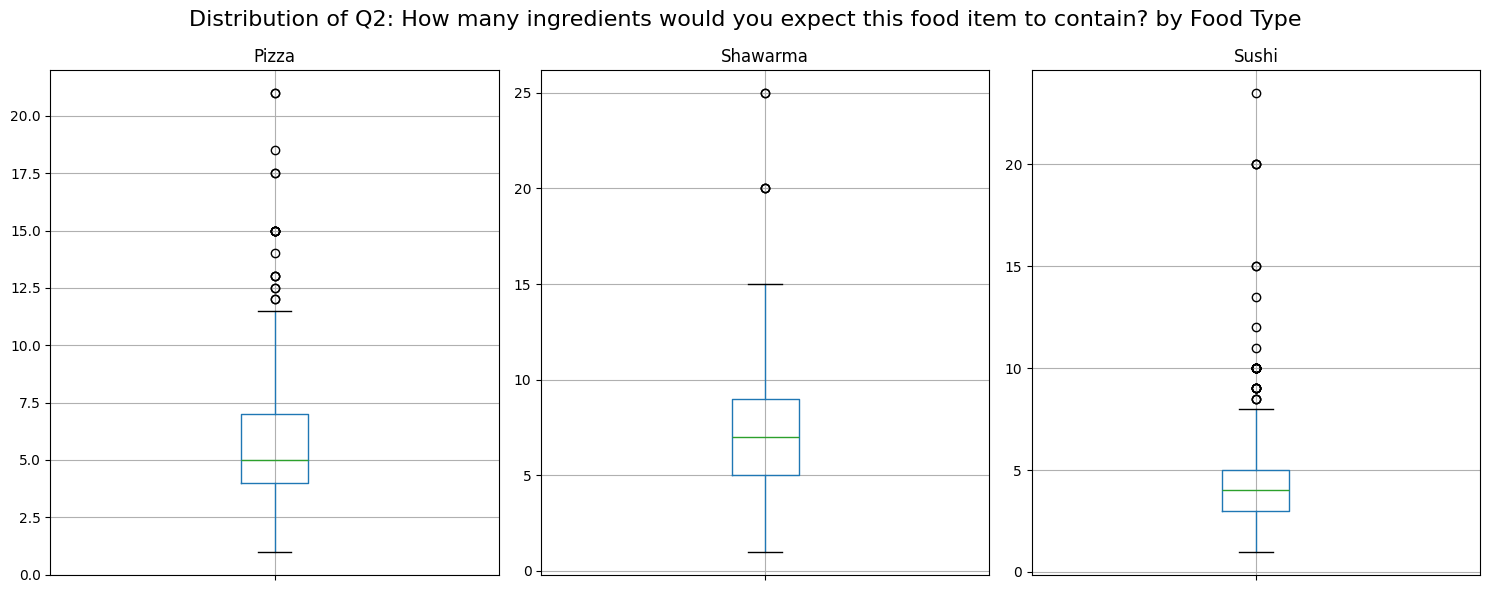

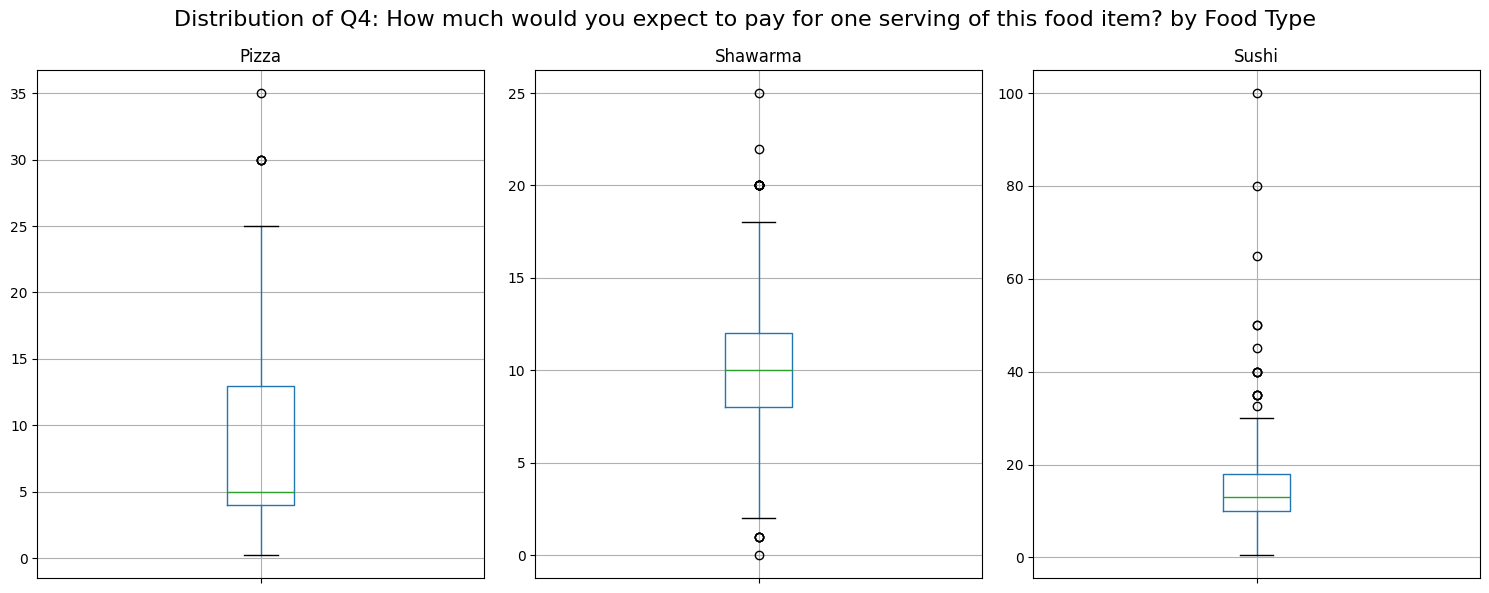

In [37]:
# Do a box plot for each numerical column, separated by food label
numerical_columns = [2, 4]
column_names = {
    2: "Q2: How many ingredients are in this food item?",
    4: "Q4: How much would you pay for this food item in dollars?"
}

# Get the unique food labels
labels = data["Label"].unique()
num_labels = len(labels)

for col_idx in numerical_columns:
    column = data.columns[col_idx]
    
    # Create figure with subplots - one for each food label
    fig, axes = plt.subplots(1, num_labels, figsize=(15, 6))
    fig.suptitle(f"Distribution of {column} by Food Type", fontsize=16)
    
    # Loop through labels and create each subplot
    for i, label in enumerate(labels):
        # Get data for this food item only
        food_data = data[data["Label"] == label]
        
        # Create boxplot in the corresponding subplot
        food_data.boxplot(column=column, ax=axes[i])
        axes[i].set_title(f"{label}")
        
        # Only show y-label for the first subplot to reduce redundancy
        if i > 0:
            axes[i].set_ylabel("")
            
        # Remove x-tick labels since there's only one category per plot
        axes[i].set_xticklabels([])
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()